In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/UniversalBank.csv')
df.head()

,ID,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,0,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,0,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,0,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,0,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [ ]:
## Create X Matrix and y vector
X = df.drop(['ID', 'Personal Loan', 'ZIP Code'], axis = 1)
y = df['Personal Loan']

In [ ]:
## Split 70% - 30% seed number = 591
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 591)

In [ ]:
X_train.shape

(3500, 11)

In [ ]:
X_test.shape

(1500, 11)

## **Decision Tree**

Decision tree classifier because the response is binary.

`Personal Loan = {0: customer did not open loan, 1: customer got loan}`

In [ ]:
## Decision Tree Import
from sklearn import DecisionTreeClassifier

## Instance
dt = DecisionTreeClassifier(criterion = "gini",max_depth = 1)

## fit on training sample
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

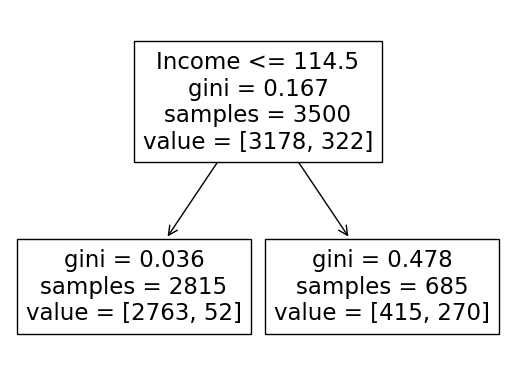

In [ ]:
## Diagram
from sklearn.tree import plot_tree

plot_tree(dt, feature_names = X_train.columns);

In [ ]:
## Gini Index of the Root Node
## For Binary Classification: 2*p1*p2
## p1 is the proportion for class 0, p2 is the proportion for class 1

2*(3178/3500)*(322/3500)

0.167072

In [ ]:
## For Binary Classification The Gini Index goes from
## 0: Completely Pure
## 0.5: Complete Impure

## Suppose we have 1750 customers who did not get the loan
## and 1750 customers who got the loan
## This is an impure node
2*(1750/3500)*(1750/3500)

0.5

In [ ]:
## Suppose we have 0 customers who did not get the loan
## and 3500 customers who got the loan
## This is an impure node
## This is a pure node
2*(0/3500)*(3500/3500)

0.0

In [ ]:
## What happens if we have more than two classes?
## The formula is then NOT 2*p1*p2*p3
## E.g.
## p1 = 50/300   bad sentiment
## p2 = 150/300  ok sentiment
## p3 = 100/300  good sentiment

Gini = 1 - ((50/300)**2 + (150/300)**2 + (100/300)**2)
Gini

0.6111111111111112

In [ ]:
## For multi-class problems the gini is not restricted to 0 and 0.5
##  (# levels - 1 / # levels) maximum gini

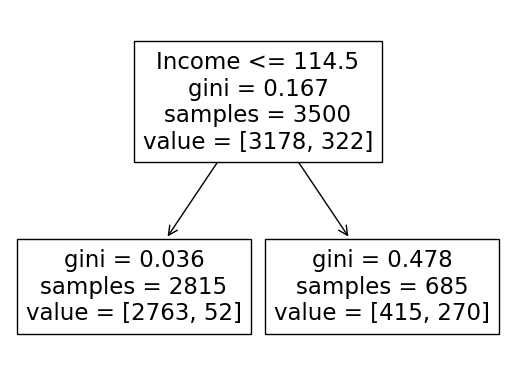

In [ ]:
plot_tree(dt, feature_names = X_train.columns);

In [ ]:
## What is the improvement in the Gini from Root node the terminal nodes
## Root Node Gini: 0.167
Combined_Gini = (2815/3500)*0.036 + (685/3500)*0.478
Combined_Gini

0.12250571428571427

In [ ]:
## Improvement on Gini
## Root node Gini - Combined Gini
0.167 - 0.12250571428571427

0.044494285714285736